# Extras

Como a principal intenção do curso é prepará-los para o uso de `SymPy` nas disciplinas que envolvem Cálculo, ao finalizar o capítulo anterior você deve estar pronto para resolver seus problemas utilizando esse módulo. Contudo, eu acredito que há muito a se falar sobre esse módulo. E, portanto, esse capítulo fará uma abordagem rápida sobre algumas coisas que são possíveis com ele.

## Geometria

Isso mesmo, nós podemos resolver problemas de Geometria tanto de forma simbólica, como de forma numérica. A ideia principal não é ficar criando plots com o sistema completo, mas sim trabalhar matemáticamente (indo para o lado da Geometria Analítica). 

Antes de começarmos essa seção e as próximas, faremos as devidas importações e definições:

In [1]:
from sympy import *
from sympy.geometry import * # Importante garantir que foi importado corretamente
x, y, z = symbols('x y z')
init_printing(use_unicode=True, use_latex='mathjax')

### 2D

Começando pela geometria em 2D, podemos seguir o processo de criar os pontos, as linhas (a partir dos pontos) e as formas 2D a partir dos segmentos. É bem simples e intuitivo, veja:

In [2]:
O = Point(0,0)
A = Point(1,2)
B = Point(3,-4)
C = Point(-2, 3)

Você pode fazer as operações padrões entre pontos normalmente. 

In [3]:
B - A ## AB

Point2D(2, -6)

Contudo, o indicado é utilizar as classes, que já terão suas propriedades a fácil acesso.

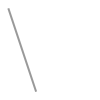

In [4]:
Segment(A,B) ## AB Simbólicamente

In [5]:
AC = Segment(A,C)
AC.slope ## inclinação

-1/3

In [6]:
AC.length ## comprimento

√10

In [7]:
AC.midpoint ## ponto médio

Point2D(-1/2, 5/2)

In [8]:
AC.contains(A) ## Contém A?

True

In [9]:
AC.distance(B) ## Menor distância ao ponto B

2⋅√10

Nós podemos criar linhas também

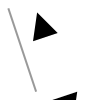

In [10]:
Line(A,B)

In [11]:
l1 = Line(A,B)
l1.equation() ## Equação da reta = 0

6⋅x + 2⋅y - 10

In [12]:
l1.coefficients ## Coeficientes da reta

(6, 2, -10)

Podemos criar uma reta ao dar um ponto inicial e uma inclinação, lembrando que: $y - y_0 = m(x-x_0)$

In [13]:
l2 = Line(C, slope = 3)
l2.equation()

-3⋅x + y - 9

In [14]:
l3 = l2.perpendicular_line(A) ## Retorna uma reta perpendicular que passa pelo ponto dado
l3.equation()

-x - 3⋅y + 7

In [15]:
l3.slope # -m^-1

-1/3

E nós podemos ver a intersecção entre duas entidades geométricas.

In [16]:
intersection(l2,l3)

[Point2D(-2, 3)]

In [17]:
intersection(l1, l3) # Ponto A

[Point2D(1, 2)]

Para plotar, de modo geral, fazemos o uso do que aprendemos no último capítulo, a função `plot_implicit`.

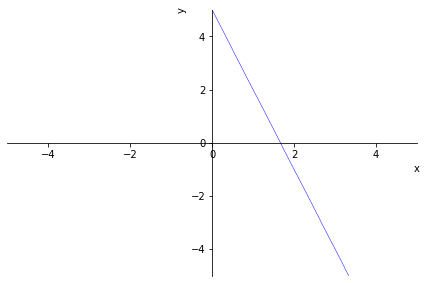

In [18]:
plot_implicit(l1.equation()) 

Podemos criar figuras geométricas e encontrar suas áreas e verficiar intersecções. Veja os exemplos:

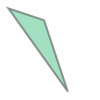

In [19]:
trig = Triangle(A,B,C) # Cria um Triângulo
trig

In [20]:
trig.area ## Não utiliza valores absolutos

-8

In [21]:
abs(trig.area) ## Correto

8

In [22]:
trig.perimeter ## Perímetro

√74 + 3⋅√10

In [23]:
trig.orthocenter ## Centro Ortogonal

Point2D(25/4, 23/4)

In [24]:
trig.circumcenter ## Circuncentro

Point2D(-17/8, -19/8)

In [25]:
trig.altitudes ## Alturas

{Point2D(-2, 3): Segment2D(Point2D(-2, 3), Point2D(2/5, 19/5)), Point2D(1, 2):
 Segment2D(Point2D(1, 2), Point2D(-19/37, 34/37)), Point2D(3, -4): Segment2D(P
oint2D(3, -4), Point2D(23/5, 4/5))}

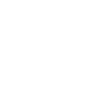

In [26]:
trig.incircle ## Círculo interno

In [27]:
trig.incircle.equation()

                 2                      2                 
⎛     -√10 + √74⎞    ⎛    2⋅(√10 + √74)⎞         256      
⎜x - ───────────⎟  + ⎜y - ─────────────⎟  - ──────────────
⎝    √74 + 3⋅√10⎠    ⎝     √74 + 3⋅√10 ⎠                 2
                                            (√74 + 3⋅√10) 

In [28]:
trig.bisectors() ## Bissetrizes

{Point2D(-2, 3): Segment2D(Point2D(-2, 3), Point2D(11/16 + sqrt(185)/16, 47/16
 - 3*sqrt(185)/16)), Point2D(1, 2): Segment2D(Point2D(1, 2), Point2D(-1/3, 2/3
)), Point2D(3, -4): Segment2D(Point2D(3, -4), Point2D(77/17 - 6*sqrt(185)/17, 
14/17 + 2*sqrt(185)/17))}

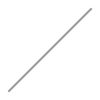

In [29]:
trig.bisectors()[A] ## Bissetriz que passa no ponto A

In [30]:
trig.is_right() ## É triângulo retângulo?

False

In [31]:
trig.is_scalene() ## É triângulo escaleno?

True

In [32]:
circ = Circle(A, 3) ## Centro e Raio
circ.equation()

       2          2    
(x - 1)  + (y - 2)  - 9

In [33]:
circ.circumference

6⋅π

In [34]:
circ.area

9⋅π

In [35]:
intersection(trig,circ)

[Point2D(-19/37 + 5*sqrt(410)/74, 34/37 - 7*sqrt(410)/74), Point2D(1 - 9*sqrt(
10)/10, 3*sqrt(10)/10 + 2), Point2D(3*sqrt(10)/10 + 1, 2 - 9*sqrt(10)/10), Poi
nt2D(-5*sqrt(410)/74 - 19/37, 34/37 + 7*sqrt(410)/74)]

In [36]:
elips = Ellipse(B, 3, 2) ## Centro, Raio Horizontal, Raio Vertical
elips.equation()

       2          2    
⎛x    ⎞    ⎛y    ⎞     
⎜─ - 1⎟  + ⎜─ + 2⎟  - 1
⎝3    ⎠    ⎝2    ⎠     

In [37]:
elips.circumference ## Não há formulas

12⋅E(5/9)

In [38]:
elips.circumference.evalf() ## Valor numérico

15.8654395892906

In [39]:
elips.area

6⋅π

In [40]:
elips.eccentricity

√5
──
3 

In [41]:
elips.foci ## Focos

(Point2D(3 - sqrt(5), -4), Point2D(sqrt(5) + 3, -4))

In [42]:
elips.focus_distance ## Distância Focal

√5

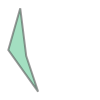

In [43]:
D = Point(0,10)
quad = Polygon(A,B,C,D)
quad

In [48]:
abs(quad.area)

39/2

In [45]:
quad.angles

⎧                      ⎛-39⋅√3922 ⎞                              ⎛54⋅√3445⎞   
⎨Point2D(-2, 3): - acos⎜──────────⎟ + 2⋅π, Point2D(0, 10): - acos⎜────────⎟ + 
⎩                      ⎝   3922   ⎠                              ⎝  3445  ⎠   

                        ⎛-5⋅√26 ⎞                        ⎛13⋅√185⎞      ⎫
2⋅π, Point2D(1, 2): acos⎜───────⎟, Point2D(3, -4): - acos⎜───────⎟ + 2⋅π⎬
                        ⎝   26  ⎠                        ⎝  185  ⎠      ⎭

In [46]:
quad.angles[A] ## No ponto A

    ⎛-5⋅√26 ⎞
acos⎜───────⎟
    ⎝   26  ⎠

In [47]:
from sympy.physics.units import degree ## Importação das unidades
quad.angles[A]/degree.scale_factor ## Transforma em Graus

        ⎛-5⋅√26 ⎞
180⋅acos⎜───────⎟
        ⎝   26  ⎠
─────────────────
        π        